In [17]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [18]:
df = pd.read_csv('Titanic-Dataset.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [19]:
#dealing with missing values
print(df.isnull().sum())

df['Age'].fillna(df['Age'].median(), inplace=True)#filling missed age with median

df.dropna(subset=['Embarked'], inplace=True)#dropping empty embarked rows

df.drop(columns=['Cabin'], inplace=True)#droppinh empty cabinn colomns

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


/tmp/ipython-input-19-478710095.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)#filling missed age with median


In [20]:
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})#label encoding for sex

df = pd.get_dummies(df, columns=['Embarked'], drop_first=True)#one hot encoding for embarked

In [21]:
#standardization
scaler = StandardScaler()
df[['Age', 'Fare']] = scaler.fit_transform(df[['Age', 'Fare']])

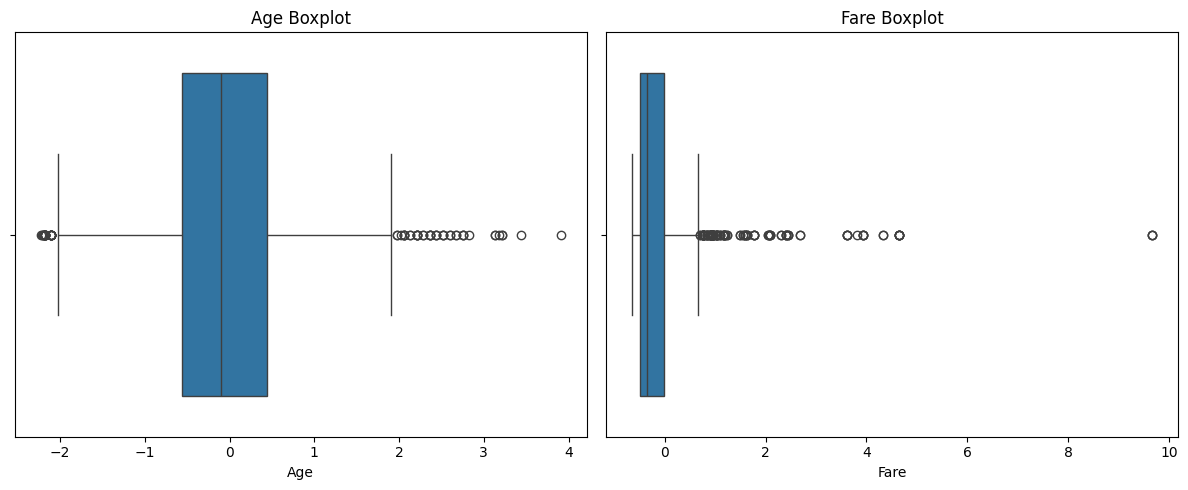

In [22]:
#detecting outliers
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.boxplot(data=df, x='Age')
plt.title("Age Boxplot")

plt.subplot(1,2,2)
sns.boxplot(data=df, x='Fare')
plt.title("Fare Boxplot")
plt.tight_layout()
plt.show()


In [23]:
#removing outliers
from scipy import stats

df_no_outliers = df[(np.abs(stats.zscore(df[['Age', 'Fare']])) < 3).all(axis=1)]


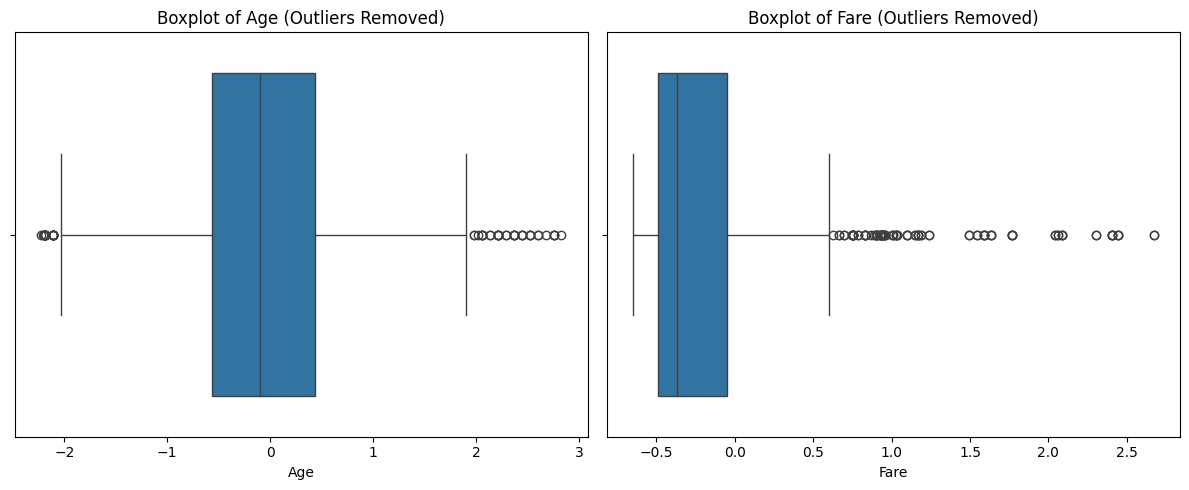

In [24]:
#clean dataframe visulization
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.boxplot(data=df_no_outliers, x='Age')
plt.title('Boxplot of Age (Outliers Removed)')

plt.subplot(1, 2, 2)
sns.boxplot(data=df_no_outliers, x='Fare')
plt.title('Boxplot of Fare (Outliers Removed)')

plt.tight_layout()
plt.show()